### Instructions

When running the notebook the first time, make sure to run all cells before making changes in the notebook. Hit Shift + Enter to run the selected cell or, in the top menu, click on: `Kernel` > `Restart Kernel and Run All Cells...` to rerun the whole notebook. If you make any changes in a cell, rerun that cell.

If you make any changes in a coding cell, rerun the notebook by `Run` > `Run Selected Cell and All Below`

In [1]:
# Import dependencies
import sys
sys.path.append('python/')
import numpy as np
import matplotlib.pyplot as plt
import rc_animation as rc_ani
import time
startTime = time.time()
from IPython.display import HTML

# Introduction to Rotation Curves

A rotation curve plots the rotational velocity of stars in a galaxy in terms of their distance from the center, also known as the radius. Using photometric data of the luminous matter, a rotation curve of a galaxy can be created. It is used to estimate the mass inside a radius by equating the centripetal force to the gravitational force:

\begin{equation}
\frac{mv^2}{r}=\frac{G M_{enc}(r)}{r^2}
\end{equation}
<br>
>where:<br>
        $v$ = rotational velocity<br>
        $G$ = gravitational constant<br>
        $M_{enc}(r)$ = enclosed mass as a function of radius<br>
        $r$ = radius or distance from the center of the galaxy
    <br>

Rotation curves of some spiral galaxies reveal a discrepancy in the measured and luminous mass. The relationship between the rotational velocity and mass is important to the study of Dark Matter. Plotting the rotation curves of edge-on spiral galaxies and their components can be used as a tool to find the Dark Matter rotation curve and its corresponding mass.

This notebook aims to demonstrate three different rotation curve types - rigid body (frisbee) rotation, planet-like rotation, and flat rotation.

### Rigid body (frisbee) rotation

The most straight-forward rotation curve is that of a rigid body, i.e. a solid disk. The rotational velocity in this case is proportional to the radius of the rotating object, which can be denoted by:

\begin{equation}
v \propto r
\end{equation}

Because of this, the rigid body has a rotation curve that increases linearly with radius. To demonstrate this, let's create two arrays for the radius and the rotational velocity called `radiusRB` and `velocityRB`, respectively:

In [2]:
radiusRB = np.array([1,2,3,4,5])
velocityRB = np.array([0.1,0.2,0.3,0.4,0.5])

In [3]:
try: # Display animation
    display(HTML('<img src="images/rigidbody.gif" width=400>'))
except FileNotFoundError: #Make it first
    rc_ani.MakeAnimation(radiusRB,velocityRB,
                         100,1,                                         # time and dt
                         'images/rigidbody.gif','Rigid Body Rotation')  # file name and title of plot
    display(HTML('<img src="images/rigidbody.gif" width=400>'))

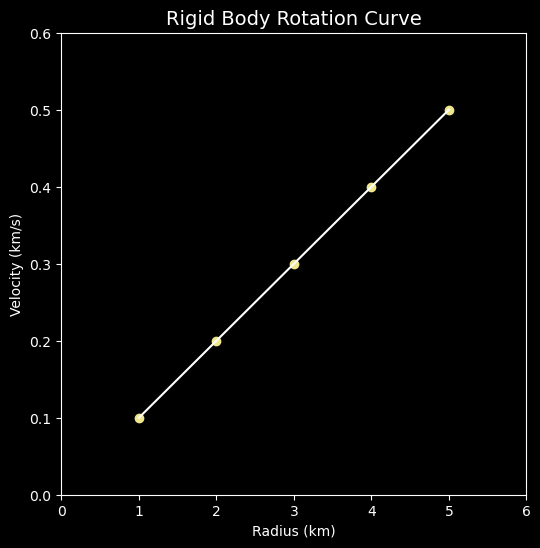

In [4]:
rc_ani.PlotRotationCurve(radiusRB,velocityRB,'Rigid Body Rotation Curve')

In rigid body rotation, all pieces of the body must maintain the same relative position to each other throughout the rotation. Another way to think about this is that all parts of a rigid body have the same angular velocity -- that is, the rate at which their angle from the horizontal changes is the same.

### Planet-like rotation

Non-rigid rotating bodies have more flexibility in their rotation. The most well-known example is the Keplerian model, which models orbital rotation in solar systems and planetary motion. This model has most of its mass concentrated in the center of the rotating object with satellites free to orbit around the center. With planet-like rotation, rotational velocity is inversely proportional to the square root of the radius:

\begin{equation}
v \propto \frac{1}{\sqrt{r}}
\end{equation}

One example is our Solar System with eight planets orbiting the Sun at the center. 

In [5]:
# Parameters
G = 6.67408e-11         # Gravitational constant (in m^3 kg^-1 s^-2)
AU = 1.496e11           # AU Astronomical Unit (in meters)

# Masses of the planets (M) in kg
M_Earth = 5.97e24      
M_Sun = 3.3e5*M_Earth
M_Mercury = 0.0553*M_Earth
M_Venus = 0.815*M_Earth
M_Mars = 0.107*M_Earth
M_Jupiter = 317.8*M_Earth
M_Saturn = 95.2*M_Earth
M_Uranus = 14.5*M_Earth
M_Neptune = 17.1*M_Earth

# Make array of masses
massesSS = np.array([M_Mercury,M_Venus,M_Earth,M_Mars,M_Jupiter,M_Saturn,M_Uranus,M_Neptune])

# Distances of planets from the Sun (r) in meters
r_Earth = AU
r_Mercury = 0.387*AU 
r_Venus = 0.723*AU
r_Mars = 1.52*AU
r_Jupiter = 5.20*AU
r_Saturn = 9.57*AU
r_Uranus = 19.17*AU
r_Neptune = 30.18*AU

# Make array of radii
radiusSS = np.array([r_Mercury,r_Venus,r_Earth,r_Mars,r_Jupiter,r_Saturn,r_Uranus,r_Neptune])

# Orbital velocity of planets (v) in m/s
v_Mercury = np.sqrt((G*M_Sun)/r_Mercury)
v_Venus = np.sqrt((G*(M_Sun+M_Mercury))/r_Venus)
v_Earth = np.sqrt((G*(M_Sun+M_Mercury+M_Venus))/r_Earth)
v_Mars = np.sqrt((G*(M_Sun+M_Mercury+M_Venus+M_Earth))/r_Mars)
v_Jupiter = np.sqrt((G*(M_Sun+M_Mercury+M_Venus+M_Earth+M_Mars))/r_Jupiter)
v_Saturn = np.sqrt((G*(M_Sun+M_Mercury+M_Venus+M_Earth+M_Mars+M_Jupiter))/r_Saturn)
v_Uranus = np.sqrt((G*(M_Sun+M_Mercury+M_Venus+M_Earth+M_Mars+M_Jupiter+M_Saturn))/r_Uranus)
v_Neptune = np.sqrt((G*(M_Sun+M_Mercury+M_Venus+M_Earth+M_Mars+M_Jupiter+M_Saturn+M_Uranus))/r_Neptune)

# Make array of velocities
velocitySS = np.array([v_Mercury,v_Venus,v_Earth,v_Mars,v_Jupiter,v_Saturn,v_Uranus,v_Neptune])

In [6]:
try: #Load the animation if it already exists
    HTML('<img src="images/solarsystem.gif width=400>') 
except FileNotFoundError: #And create it if it doesn't
    rc_ani.MakeAnimation(1e-3*radiusSS,1e-3*velocitySS,   # change distance unit to km, velocity unit to km/s
                         5e10,1e7,                        # time and dt
                         'images/solarsystem.gif','Planet-like Rotation',
                         1e8,1e8,                         # xlim and ylim
                         size=True,masses=massesSS)    
    # Display animation
    HTML('<img src="images/solarsystem.gif" width=400>')

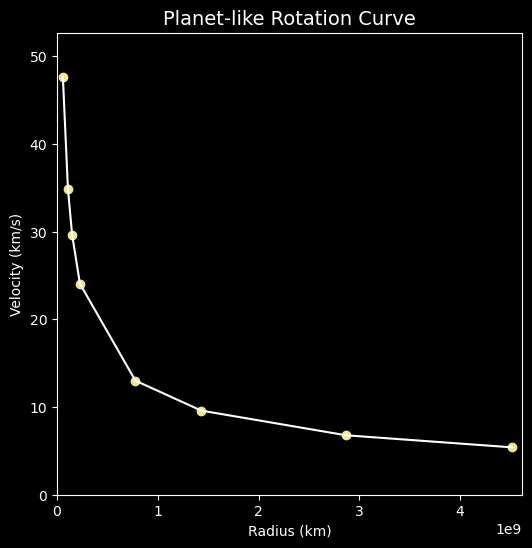

In [7]:
rc_ani.PlotRotationCurve(1e-3*radiusSS,1e-3*velocitySS,
                  'Planet-like Rotation Curve',
                  xlabel='Radius (km)',ylabel='Velocity (km/s)',
                  xlim=1e8,ylim=5)

In a planet-like rotation, none of the bodies are attached to one another in any way, so they can move in relation to one another. Often, there is a single, dominant source of mass at the center -- in the case of our Solar system, the Sun is massive enough that we can ignore the masses of planets in our calculations. However, if there is a significant amount of mass between the center and the bodies we are observing, we may get different results...

### Expected galactic rotation

Similar to planet-like rotation, the rotation curve of galaxies should decline at larger radii with the difference of rotational velocities of stars and gas gradually increasing closer to the center. A quick sketch is shown below to compare with other rotation curves but an intensive calculation of this expected galactic rotation is included in the upcoming workshop modules. 

In [8]:
# Arbitrary distance and velocity for animation and plot
radiusEGR = np.array([1,2,2.5,3,3.5,4,5,6,7])
velocityEGR = np.array([0.10,0.23,0.27,0.29,0.27,0.24,0.21,0.19,0.18])

In [9]:
try:
    display(HTML('<img src="images/expgalacticrotation.gif" width=400>'))
except FileNotFoundError:
    rc_ani.MakeAnimation(radiusEGR,velocityEGR,
                         200,1,                                       # time and dt
                         'images/expgalacticrotation.gif','Expected Galactic Rotation')   # file name and title of plot
    # Display animation
    display(HTML('<img src="images/expgalacticrotation.gif" width=400>'))

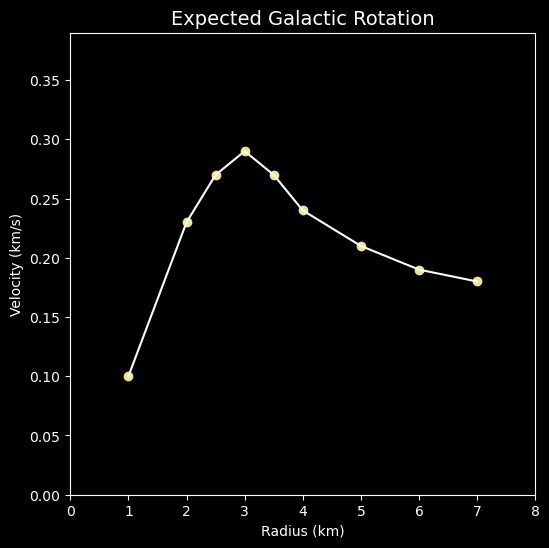

In [10]:
rc_ani.PlotRotationCurve(radiusEGR,velocityEGR,'Expected Galactic Rotation')

### Flat rotation

The mass distribution of a galaxy based on luminous matter is similar to the mass distribution of the Keplerian model. Surprisingly, some of the rotation curves of galaxies are entirely different than the rotation curve of planetary motion. The curve for spiral galaxies quickly increases from the center to a relatively constant velocity: 

\begin{equation}
v \sim constant
\end{equation}

This type of rotation curve suggests there is more mass spread throughout the galaxy than we can see. This 'missing mass' is what we call Dark Matter.

In [11]:
# Arbitrary distance and velocity for animation and plot
radiusFR = np.array([1,2,3,4,5,6,7])
velocityFR = np.array([0.1,0.24,0.29,0.31,0.31,0.31,0.31])

In [12]:
try:
    display(HTML('<img src="images/flatrotation.gif" width=400>'))
except FileNotFoundError:
    rc_ani.MakeAnimation(radiusFR,velocityFR,
                         200,1,                                       # time and dt
                         'images/flatrotation.gif','Flat Rotation')   # file name and title of plot
    # Display animation
    display(HTML('<img src="images/flatrotation.gif" width=400>'))

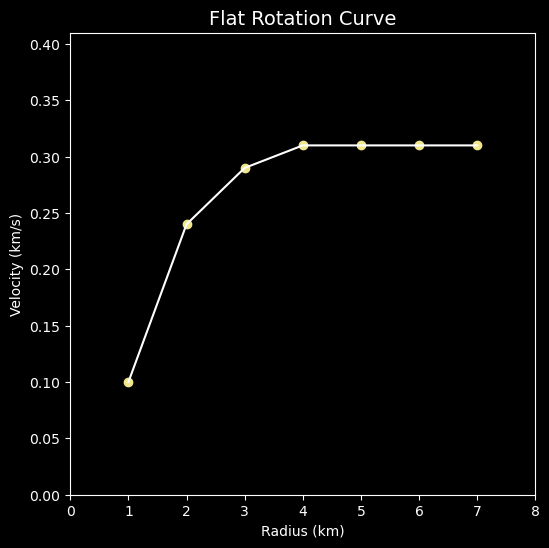

In [13]:
rc_ani.PlotRotationCurve(radiusFR,velocityFR,'Flat Rotation Curve')

We see that velocity increases as we move outward. This is because, for a galaxy, mass is spread out throughout the galaxy, rather than being largely concentrated at the center. However, what we would expect to see is for the velocity to start dropping off at some point because the concentration of mass is still expected to be lower as we approach the edges, even if not negligibly so. This is why the flatness seems to indicate that there is 'missing' mass in our data.

### Comparison of expected galactic rotation and flat rotation

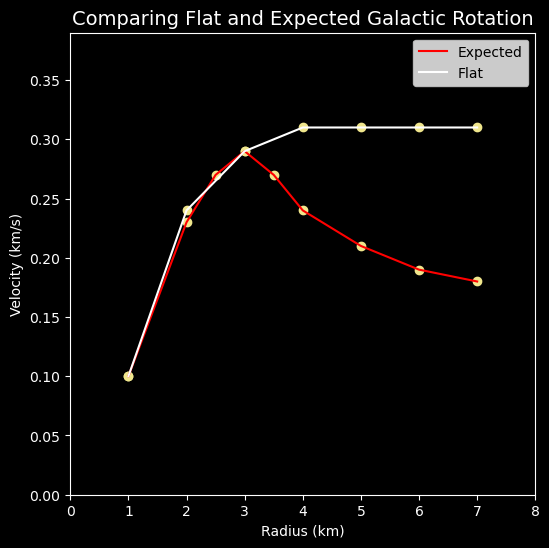

In [14]:
# Plot
fig = plt.figure(figsize=(6,6),dpi=100)
ax = plt.axes()
    
fig.patch.set_facecolor('black')
ax.set_facecolor('black')
ax.set_xlabel('Radius (km)',color='white')
ax.set_ylabel('Velocity (km/s)',color='white')
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['right'].set_color('white')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
    
plt.title('Comparing Flat and Expected Galactic Rotation',color='white',fontsize='14')
plt.scatter(radiusEGR,velocityEGR,color='khaki')
plt.plot(radiusEGR,velocityEGR,color='red',label='Expected')
plt.scatter(radiusFR,velocityFR,color='khaki')
plt.plot(radiusFR,velocityFR,color='white',label='Flat')
plt.xlim(0,np.max(radiusEGR)+1)
plt.ylim(0,np.max(velocityEGR)+0.1)
plt.legend()
plt.show()

Comparing the expected galactic rotation curve and the observed flat rotation curve in one plot reveals the discrepancies that can be further investigated in the following modules. 

In [15]:
#NBVAL_IGNORE_OUTPUT
#Because the calculation time naturally varies.
# Calculation time
executionTime3 = (time.time() - startTime)
ttt3=executionTime3/60
print(f'Execution time: {ttt3:.2f} minutes')

Execution time: 0.02 minutes


### References

>Carroll, B. W., &amp; Ostlie, D. A. (2018). **An Introduction to Modern Astrophysics**. Cambridge University Press. <br><br>
>Williams, D. (2021, December 27). **Planetary Fact Sheet**. NASA. Retrieved February 27, 2022, from https://nssdc.gsfc.nasa.gov/planetary/factsheet/